In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine, text
from getpass import getpass
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Connection parameters to PostgreSQL
DB_USER = "postgres"         
DB_PASSWORD = getpass()
DB_HOST = "localhost"         
DB_PORT = "5432"             
DB_NAME = "ecommerce"         

# Create connection
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

 ········


In [34]:
df = pd.read_sql('''
SELECT *
FROM order_sample_ready_to_ml_features_fixed
''', engine).astype(float)

df.delivery_time = df.delivery_time.clip(lower=0)
df.estimated_delivery_days = df.estimated_delivery_days.clip(lower=0)

df.head()

,category_share_other_category_sum,sel2cust_dist,category_count_moveis_decoracao_sum,avg_review_score_bin,product_width_cm_min,category_share_utilidades_domesticas_sum,category_share_informatica_acessorios_sum,product_height_cm_min,category_count_beleza_saude_sum,product_name_lenght_std,...,payment_installments,category_count_telefonia_sum,estimated_delivery_days,category_count_esporte_lazer_sum,category_count_cama_mesa_banho_sum,price_min,category_count_other_category_sum,freight_value_min,category_count_automotivo_sum,delivery_time
0,1.0,0.000000,0.0,2.0,14.0,0.0,0.0,9.0,0.0,0.0,...,2.0,0.0,15.0,0.0,0.0,58.90,1.0,13.29,0.0,7.0
1,1.0,5.510120,0.0,1.0,40.0,0.0,0.0,30.0,0.0,0.0,...,3.0,0.0,18.0,0.0,0.0,239.90,1.0,19.93,0.0,16.0
2,0.0,2.865357,1.0,1.0,33.0,0.0,0.0,13.0,0.0,0.0,...,5.0,0.0,21.0,0.0,0.0,199.00,0.0,17.87,0.0,8.0
3,1.0,2.652272,0.0,1.0,15.0,0.0,0.0,10.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,12.99,1.0,12.79,0.0,6.0
4,0.0,6.316069,0.0,1.0,30.0,0.0,0.0,40.0,0.0,0.0,...,3.0,0.0,40.0,0.0,0.0,199.90,0.0,18.14,0.0,25.0


In [36]:
# Load best NN scores
df['best_NN_score_alpha3'] = pd.read_csv('./scores/best_NN_score_full_X_alpha3.csv')['best_NN_score_alpha3']
df['best_NN_score_alpha2'] = pd.read_csv('./scores/best_NN_score_full_X_alpha2.csv')['best_NN_score_alpha2']
df['best_NN_score_alpha1_5'] = pd.read_csv('./scores/best_NN_score_full_X_alpha1_5.csv')['best_NN_score_alpha1.5']
df['best_NN_score_alpha1'] = pd.read_csv('./scores/best_NN_score_full_X_alpha1.csv')['best_NN_score_alpha1']
df['best_NN_score_alpha1_tr'] = pd.read_csv('./scores/best_NN_score_full_X_alpha1_tr.csv')['best_NN_score_alpha1_tr']
df['best_NN_score_alpha1_5_tr'] = pd.read_csv('./scores/best_NN_score_full_X_alpha1_5_tr.csv')['best_NN_score_alpha1_5_tr']

df.head()

,category_share_other_category_sum,sel2cust_dist,category_count_moveis_decoracao_sum,avg_review_score_bin,product_width_cm_min,category_share_utilidades_domesticas_sum,category_share_informatica_acessorios_sum,product_height_cm_min,category_count_beleza_saude_sum,product_name_lenght_std,...,category_count_other_category_sum,freight_value_min,category_count_automotivo_sum,delivery_time,best_NN_score_alpha3,best_NN_score_alpha2,best_NN_score_alpha1_5,best_NN_score_alpha1,best_NN_score_alpha1_tr,best_NN_score_alpha1_5_tr
0,1.0,0.000000,0.0,2.0,14.0,0.0,0.0,9.0,0.0,0.0,...,1.0,13.29,0.0,7.0,9.822489,8.216280,7.563343,6.357121,6.683411,7.134912
1,1.0,5.510120,0.0,1.0,40.0,0.0,0.0,30.0,0.0,0.0,...,1.0,19.93,0.0,16.0,16.574108,16.976336,15.063684,13.871531,11.337145,13.045151
2,0.0,2.865357,1.0,1.0,33.0,0.0,0.0,13.0,0.0,0.0,...,0.0,17.87,0.0,8.0,14.146536,12.600581,11.520149,9.984439,10.551388,11.847788
3,1.0,2.652272,0.0,1.0,15.0,0.0,0.0,10.0,0.0,0.0,...,1.0,12.79,0.0,6.0,7.686505,7.352694,6.962753,6.405249,6.216235,6.719561
4,0.0,6.316069,0.0,1.0,30.0,0.0,0.0,40.0,0.0,0.0,...,0.0,18.14,0.0,25.0,21.642635,18.579575,17.196363,16.070763,15.058294,16.911118


In [6]:
# Restore order_id

oid = pd.read_sql('''
SELECT order_id, 
sel2cust_dist, product_width_cm_min, price_min -- just to check correctness
FROM order_sample_ready_for_feature_analysis
''', engine)

oid.head()

,order_id,sel2cust_dist,product_width_cm_min,price_min
0,00010242-fe8c-5a6d-1ba2-dd792cb16214,0.000000,14.0,58.90
1,00018f77-f2f0-320c-5571-90d7a144bdd3,5.510120,40.0,239.90
2,000229ec-3982-24ef-6ca0-657da4fc703e,2.865357,33.0,199.00
3,00024acb-cdf0-a6da-a1e9-31b038114c75,2.652272,15.0,12.99
4,00042b26-cf59-d7ce-69df-abb4e55b4fd9,6.316069,30.0,199.90


In [7]:
oid.shape

(96383, 4)

In [9]:
df[['sel2cust_dist', 'product_width_cm_min', 'price_min']]

,sel2cust_dist,product_width_cm_min,price_min
0,0.000000,14.0,58.90
1,5.510120,40.0,239.90
2,2.865357,33.0,199.00
3,2.652272,15.0,12.99
4,6.316069,30.0,199.90
...,...,...,...
96378,24.803301,40.0,299.99
96379,3.351783,38.0,350.00
96380,3.241389,19.0,99.90
96381,0.659452,20.0,55.99


In [10]:
oid.tail()

,order_id,sel2cust_dist,product_width_cm_min,price_min
96378,fffc94f6-ce00-a005-8188-0bf54a75a037,24.803301,40.0,299.99
96379,fffcd46e-f226-3f40-4302-a634eb57f7eb,3.351783,38.0,350.00
96380,fffce470-5a96-62cd-70ad-b13d4a31832d,3.241389,19.0,99.90
96381,fffe1854-4ffa-bc95-dfad-a21779c9644f,0.659452,20.0,55.99
96382,fffe41c6-4501-cc87-c801-fd61db3f6244,1.222836,19.0,43.00


### Everything's right

In [37]:
df['order_id'] = oid['order_id']

df.head()

,category_share_other_category_sum,sel2cust_dist,category_count_moveis_decoracao_sum,avg_review_score_bin,product_width_cm_min,category_share_utilidades_domesticas_sum,category_share_informatica_acessorios_sum,product_height_cm_min,category_count_beleza_saude_sum,product_name_lenght_std,...,freight_value_min,category_count_automotivo_sum,delivery_time,best_NN_score_alpha3,best_NN_score_alpha2,best_NN_score_alpha1_5,best_NN_score_alpha1,best_NN_score_alpha1_tr,best_NN_score_alpha1_5_tr,order_id
0,1.0,0.000000,0.0,2.0,14.0,0.0,0.0,9.0,0.0,0.0,...,13.29,0.0,7.0,9.822489,8.216280,7.563343,6.357121,6.683411,7.134912,00010242-fe8c-5a6d-1ba2-dd792cb16214
1,1.0,5.510120,0.0,1.0,40.0,0.0,0.0,30.0,0.0,0.0,...,19.93,0.0,16.0,16.574108,16.976336,15.063684,13.871531,11.337145,13.045151,00018f77-f2f0-320c-5571-90d7a144bdd3
2,0.0,2.865357,1.0,1.0,33.0,0.0,0.0,13.0,0.0,0.0,...,17.87,0.0,8.0,14.146536,12.600581,11.520149,9.984439,10.551388,11.847788,000229ec-3982-24ef-6ca0-657da4fc703e
3,1.0,2.652272,0.0,1.0,15.0,0.0,0.0,10.0,0.0,0.0,...,12.79,0.0,6.0,7.686505,7.352694,6.962753,6.405249,6.216235,6.719561,00024acb-cdf0-a6da-a1e9-31b038114c75
4,0.0,6.316069,0.0,1.0,30.0,0.0,0.0,40.0,0.0,0.0,...,18.14,0.0,25.0,21.642635,18.579575,17.196363,16.070763,15.058294,16.911118,00042b26-cf59-d7ce-69df-abb4e55b4fd9


In [40]:
df_scores = df[['order_id', 'best_NN_score_alpha1_tr', 'best_NN_score_alpha1_5_tr', 'best_NN_score_alpha1', 'best_NN_score_alpha1_5', 'best_NN_score_alpha2', 'best_NN_score_alpha3', 'delivery_time', 'estimated_delivery_days']]


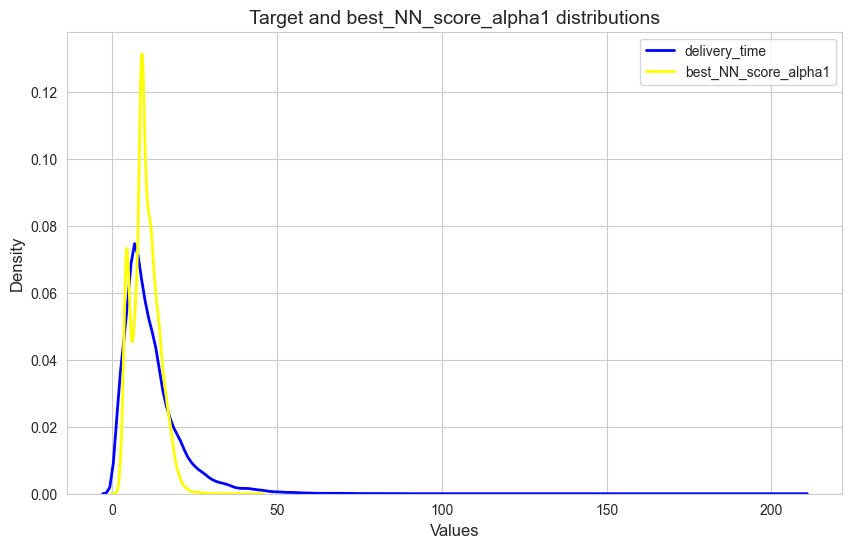

In [38]:
# Distribution of best_NN_score_alpha1 compared to distribution of target

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "yellow"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha1']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha1 distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


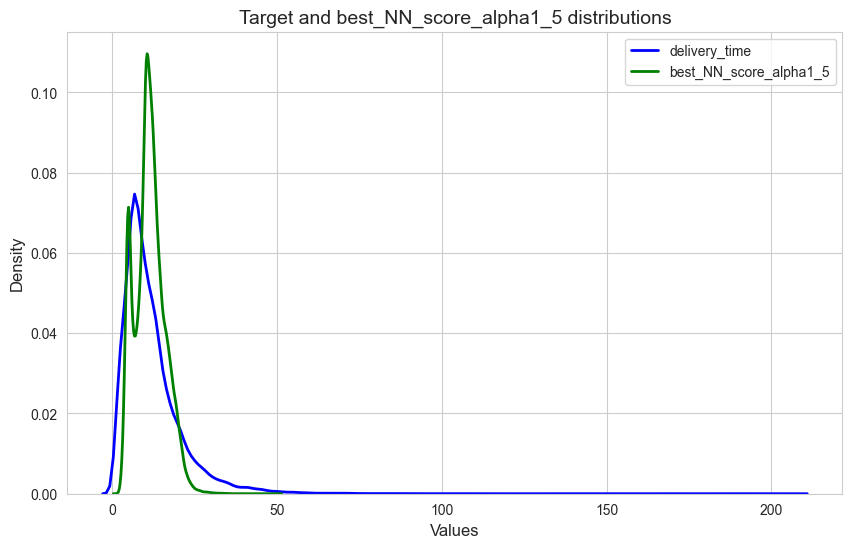

In [20]:
# Distribution of best_NN_score_alpha1_5 compared to distribution of target

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "green"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha1_5']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha1_5 distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


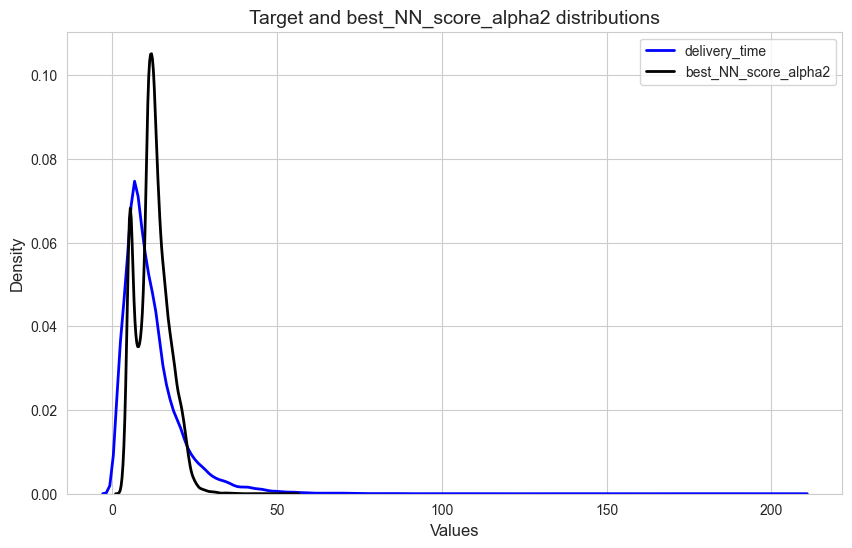

In [18]:
# Distribution of best_NN_score_alpha1 compared to distribution of target


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "black"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha2']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha2 distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()


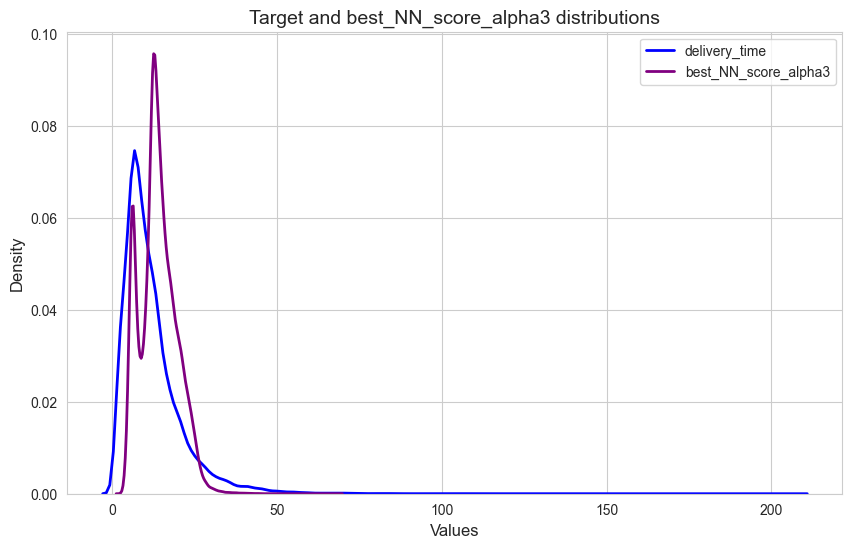

In [21]:
# Distribution of best_NN_score_alpha1 compared to distribution of target


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "purple"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha3']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha3 distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

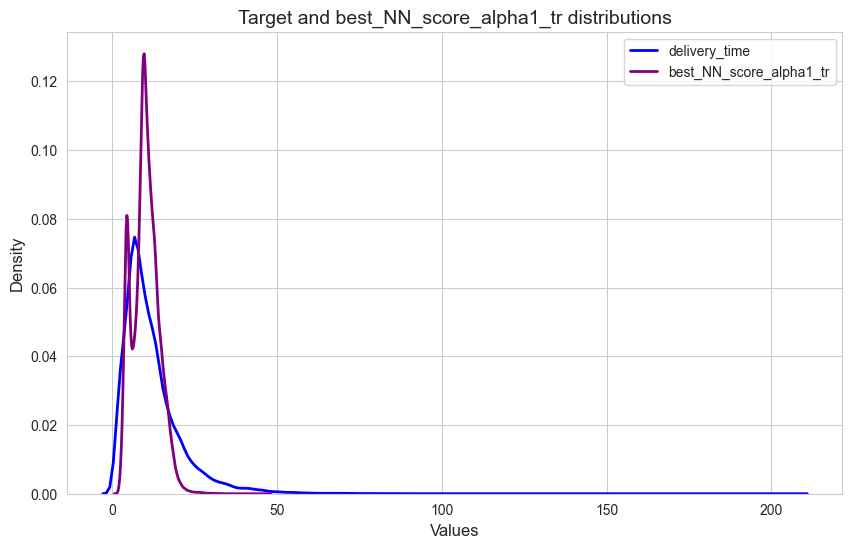

In [41]:
# Distribution of best_NN_score_alpha1 compared to distribution of target


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "purple"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha1_tr']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha1_tr distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

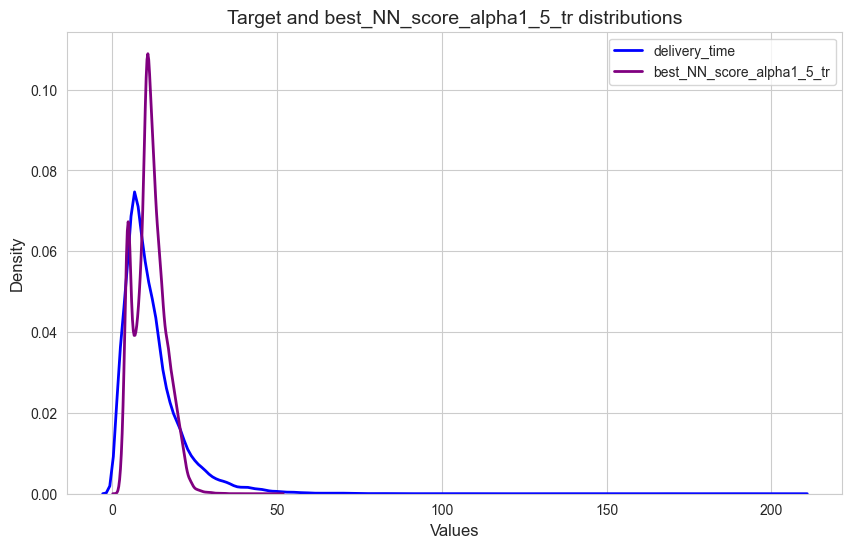

In [42]:
# Distribution of best_NN_score_alpha1 compared to distribution of target


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "purple"]

for col, color in zip(df_scores[['delivery_time', 'best_NN_score_alpha1_5_tr']].columns, colors):
    sns.kdeplot(df_scores[col], label=col, color=color, linewidth=2)

plt.legend()
plt.title("Target and best_NN_score_alpha1_5_tr distributions", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

# Let's explore this dropdown in distributions of every score

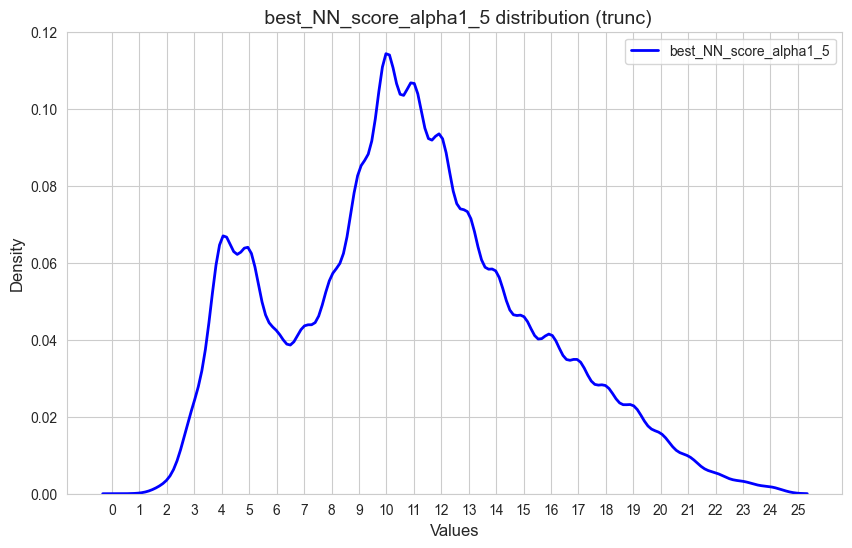

In [33]:
# Distribution of best_NN_score_alpha1 compared to distribution of target (truncated up to 25)


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 
colors = ["blue", "purple"]

for col, color in zip(df_scores[['best_NN_score_alpha1_5']].columns, colors):
    sns.kdeplot(df_scores[df_scores.best_NN_score_alpha1_5 < 25][col].astype(int), label=col, color=color, linewidth=2)

plt.legend()
plt.title(" best_NN_score_alpha1_5 distribution (trunc)", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(np.arange(0, 26, 1)) 

plt.show()

### Out model tends to overestimate delivery time which is better for business purposes. Procced further then

### Let's join order_review

In [44]:
orev = pd.read_sql('''
SELECT order_id, review_score
from order_reviews
''', engine)

orev.head()

,order_id,review_score
0,73fc7af8-7114-b397-12e6-da79b0a377eb,4
1,a548910a-1c61-4779-6b98-fdf73dbeba33,5
2,f9e4b658-b201-a9f2-ecde-cbb34bed034b,5
3,658677c9-7b38-5a9b-e170-737859d3511b,5
4,8e6bfb81-e283-fa7e-4f11-123a3fb894f1,5


In [60]:
df_scores.order_id = df_scores.order_id.astype(str)
orev.order_id = orev.order_id.astype(str)
df_scores_reviews = df_scores.merge(orev, how='inner', on='order_id')

print(df_scores_reviews.shape)
df_scores_reviews.head()

(96267, 10)


/var/folders/q8/ftp_43616hxb8y78vh3691gw0000gn/T/ipykernel_1632/4115795656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores.order_id = df_scores.order_id.astype(str)


,order_id,best_NN_score_alpha1_tr,best_NN_score_alpha1_5_tr,best_NN_score_alpha1,best_NN_score_alpha1_5,best_NN_score_alpha2,best_NN_score_alpha3,delivery_time,estimated_delivery_days,review_score
0,00010242-fe8c-5a6d-1ba2-dd792cb16214,6.683411,7.134912,6.357121,7.563343,8.216280,9.822489,7.0,15.0,5
1,00018f77-f2f0-320c-5571-90d7a144bdd3,11.337145,13.045151,13.871531,15.063684,16.976336,16.574108,16.0,18.0,4
2,000229ec-3982-24ef-6ca0-657da4fc703e,10.551388,11.847788,9.984439,11.520149,12.600581,14.146536,8.0,21.0,5
3,00024acb-cdf0-a6da-a1e9-31b038114c75,6.216235,6.719561,6.405249,6.962753,7.352694,7.686505,6.0,11.0,4
4,00042b26-cf59-d7ce-69df-abb4e55b4fd9,15.058294,16.911118,16.070763,17.196363,18.579575,21.642635,25.0,40.0,5


# Let's make some overall business evaluation

### For every estimation let's take number of mistakes (of more than M days) divided by the same value for estimated_delivery_days (baseline) as our metric of success

In [79]:
M = 3

baseline_sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews['estimated_delivery_days']) >= M).sum()
for c in df_scores_reviews.drop(columns=['order_id', 'review_score', 'delivery_time', 'estimated_delivery_days']).columns:
    sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews[c]) >= M).sum() / baseline_sr
    print(f"Delay rate on whole data set with {c} as delivery time estimation: {sr}")

Delay rate on whole data set with best_NN_score_alpha1_tr as delivery time estimation: 0.5232599749507962
Delay rate on whole data set with best_NN_score_alpha1_5_tr as delivery time estimation: 0.5721506530685274
Delay rate on whole data set with best_NN_score_alpha1 as delivery time estimation: 0.5250268384326355
Delay rate on whole data set with best_NN_score_alpha1_5 as delivery time estimation: 0.5732801037752728
Delay rate on whole data set with best_NN_score_alpha2 as delivery time estimation: 0.6305466094113437
Delay rate on whole data set with best_NN_score_alpha3 as delivery time estimation: 0.7162730363213455


### Take best_NN_score_alpha1_tr as our best score

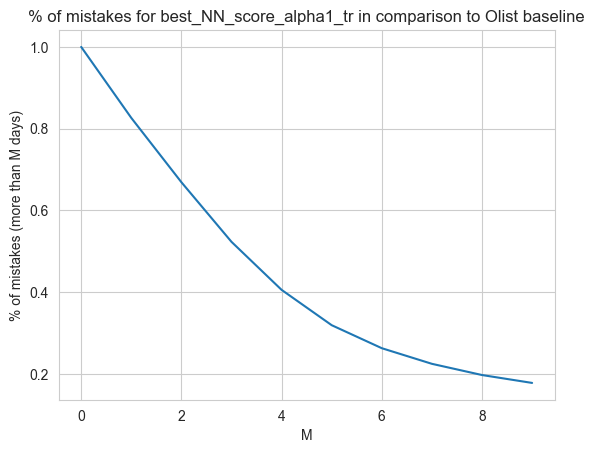

In [82]:
srs = []

for M in range(10):
    baseline_sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews['estimated_delivery_days']) >= M).sum()
    sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews['best_NN_score_alpha1_tr']) >= M).sum() / baseline_sr
    srs.append(sr)

plt.plot(np.array(srs))
plt.title(f"% of mistakes for best_NN_score_alpha1_tr in comparison to Olist baseline")
plt.xlabel('M')
plt.ylabel('% of mistakes (more than M days)')
plt.show()

### Hence our model predicts delivery time much more accurate than baseline
# But what about our first problem? The problem of low review scores on the orders with big delivery delay?

In [84]:
# Problematics set - big delays, low review scores

score_thresh = 2
delay_thresh = 3

prob_set = df_scores_reviews[(df_scores_reviews.review_score <= score_thresh) &
            (df_scores_reviews.delivery_time - df_scores_reviews.estimated_delivery_days >= delay_thresh)]

prob_set.shape

(3831, 10)

### Again let's take best_NN_score_alpha1_tr

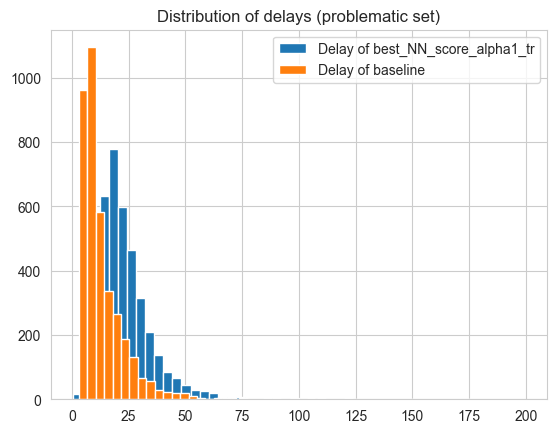

In [86]:
plt.hist(prob_set.delivery_time - prob_set.best_NN_score_alpha1_tr, label='Delay of best_NN_score_alpha1_tr',bins=50)
plt.hist(prob_set.delivery_time - prob_set.estimated_delivery_days, label='Delay of baseline',bins=50)
plt.legend()
plt.title("Distribution of delays (problematic set)")

plt.show()

### On the problematic set delays of our score are bigger

# Let's construct the new score: mean(baseline, our NN score)

In [105]:
df_scores_reviews['construct_mean'] = df_scores_reviews[['estimated_delivery_days', 'best_NN_score_alpha1_tr']].values.mean(1)

df_scores_reviews.head()

,order_id,best_NN_score_alpha1_tr,best_NN_score_alpha1_5_tr,best_NN_score_alpha1,best_NN_score_alpha1_5,best_NN_score_alpha2,best_NN_score_alpha3,delivery_time,estimated_delivery_days,review_score,construct_mean
0,00010242-fe8c-5a6d-1ba2-dd792cb16214,6.683411,7.134912,6.357121,7.563343,8.216280,9.822489,7.0,15.0,5,10.841705
1,00018f77-f2f0-320c-5571-90d7a144bdd3,11.337145,13.045151,13.871531,15.063684,16.976336,16.574108,16.0,18.0,4,14.668572
2,000229ec-3982-24ef-6ca0-657da4fc703e,10.551388,11.847788,9.984439,11.520149,12.600581,14.146536,8.0,21.0,5,15.775694
3,00024acb-cdf0-a6da-a1e9-31b038114c75,6.216235,6.719561,6.405249,6.962753,7.352694,7.686505,6.0,11.0,4,8.608118
4,00042b26-cf59-d7ce-69df-abb4e55b4fd9,15.058294,16.911118,16.070763,17.196363,18.579575,21.642635,25.0,40.0,5,27.529147


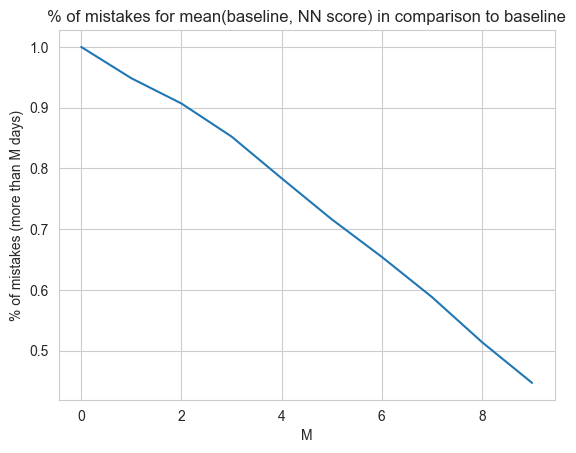

In [108]:
srs = []

for M in range(10):
    baseline_sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews['estimated_delivery_days']) >= M).sum()
    sr = (np.fabs(df_scores_reviews.delivery_time - df_scores_reviews['construct_mean']) >= M).sum() / baseline_sr
    srs.append(sr)

plt.plot(np.array(srs))
plt.title(f"% of mistakes for mean(baseline, NN score) in comparison to baseline")
plt.xlabel('M')
plt.ylabel('% of mistakes (more than M days)')
plt.show()

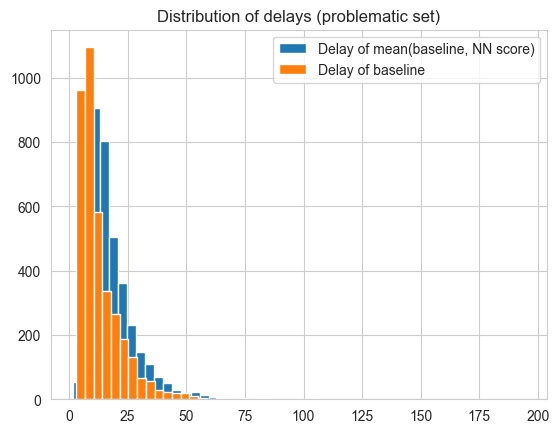

In [109]:
# Problematics set - big delays, low review scores

score_thresh = 2
delay_thresh = 3

prob_set = df_scores_reviews[(df_scores_reviews.review_score <= score_thresh) &
            (df_scores_reviews.delivery_time - df_scores_reviews.estimated_delivery_days >= delay_thresh)]

plt.hist(prob_set.delivery_time - prob_set.construct_mean, label='Delay of mean(baseline, NN score)',bins=50)
plt.hist(prob_set.delivery_time - prob_set.estimated_delivery_days, label='Delay of baseline',bins=50)
plt.legend()
plt.title("Distribution of delays (problematic set)")

plt.show()

### Mean value of our score and the baseline solves the main problem better while still being more accurate than the latter (even though less accurate than the former)

In [112]:
# Proceed in tableau
df_scores_reviews.to_csv('./scores/df_scores_reviews.csv')